# In class, week 02

## First: reminder of last week

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

Reading in data from a CSV file (the hard way!)

In [4]:
def converter(v): # a converter for our csv file (it has some dates)
    return datetime.strptime(v.decode("ascii"), '%Y-%m-%d')

In [5]:
# link to where I have stored my GDP.csv
myFredFile = '/Users/jillnaiman/Downloads/GDP.csv'

In [6]:
myFredType = np.dtype([("date", datetime), ("gdp", np.float64)])

In [7]:
with open(myFredFile, "r") as f:
    data = np.loadtxt(f, skiprows=1, delimiter=",", 
                      converters={0: converter}, 
                      dtype=myFredType)

In [8]:
data

array([(datetime.datetime(1947, 1, 1, 0, 0),   243.164),
       (datetime.datetime(1947, 4, 1, 0, 0),   245.968),
       (datetime.datetime(1947, 7, 1, 0, 0),   249.585),
       (datetime.datetime(1947, 10, 1, 0, 0),   259.745),
       (datetime.datetime(1948, 1, 1, 0, 0),   265.742),
       (datetime.datetime(1948, 4, 1, 0, 0),   272.567),
       (datetime.datetime(1948, 7, 1, 0, 0),   279.196),
       (datetime.datetime(1948, 10, 1, 0, 0),   280.366),
       (datetime.datetime(1949, 1, 1, 0, 0),   275.034),
       (datetime.datetime(1949, 4, 1, 0, 0),   271.351),
       (datetime.datetime(1949, 7, 1, 0, 0),   272.889),
       (datetime.datetime(1949, 10, 1, 0, 0),   270.627),
       (datetime.datetime(1950, 1, 1, 0, 0),   280.828),
       (datetime.datetime(1950, 4, 1, 0, 0),   290.383),
       (datetime.datetime(1950, 7, 1, 0, 0),   308.153),
       (datetime.datetime(1950, 10, 1, 0, 0),   319.945),
       (datetime.datetime(1951, 1, 1, 0, 0),   336.   ),
       (datetime.datetime(1

Text(0, 0.5, 'GDP in Billions')

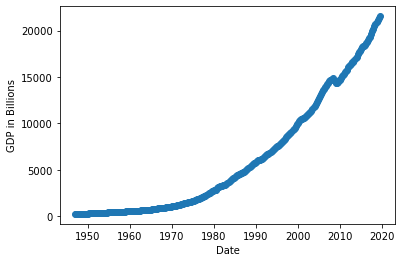

In [12]:
plt.plot(data['date'], data['gdp'], 'o-')
plt.xlabel('Date')
plt.ylabel('GDP in Billions')

We've been using "plt" to make "quick plots" but sometimes we want to have access to the different objects that make up our plot (axis, figure canvas, etc).

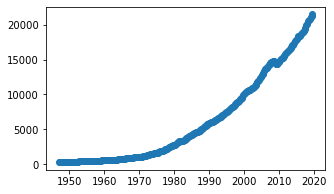

In [18]:
fig, ax = plt.subplots(figsize=(5,3))

ax.plot(data['date'], data['gdp'], 'o-')

plt.show()

In [19]:
ax
# printing out what our axes object is

## Dealing with Raster Images

We'll be using the PILLOW image package to read in our image data.

(OpenCV)

In [20]:
import PIL.Image as Image # importing ONLY the Image set of functions

The PILLOW package has a lot of drawing/cropping/etc functions in it, but we'll mostly be using it as a data reader.

In [23]:
#im = Image.open("/Users/jillnaiman/Downloads/stitch_reworked.png")
# another option if you've stored the stitch_reworked.png in the same file as this notebook:
im = Image.open("stitch_reworked.png") # looking ahead: this is actually a better option!

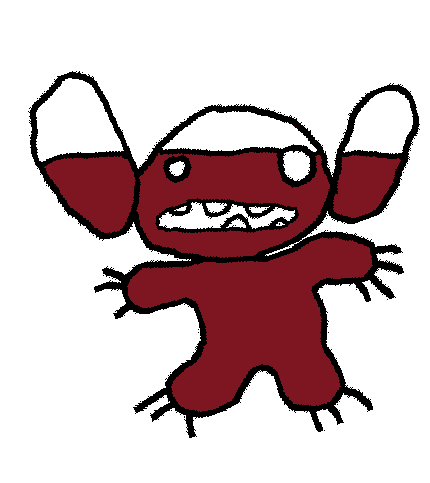

In [24]:
im

We can transform this Image into data we can work with using NumPy:

In [25]:
im_data = np.array(im)

In [26]:
im_data

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

In [27]:
im_data.shape # this tells us y,x, RGBA

(483, 430, 4)

In [30]:
im_data.shape[2]

4

In [29]:
np.unique(im_data) # tells us the unique numbers in the WHOLE of the data set

array([  0,  22,  33, 126, 255], dtype=uint8)

One way to see the unique RGBA combinations is to loop over the last element of the image shape and print them out:

In [33]:
channel_labels = ['R', 'G', 'B', 'A']
for i in range(im_data.shape[2]):
    print('channel = ', channel_labels[i], ', unique values=', np.unique(im_data[:,:,i])) 
                                            # prints out numbers in each channel

channel =  R , unique values= [  0 126 255]
channel =  G , unique values= [  0  22 255]
channel =  B , unique values= [  0  33 255]
channel =  A , unique values= [  0 255]


This is almost there, but not quite what we want.  So, we can do some "numpy magic".

In [34]:
im_data.shape

(483, 430, 4)

In [36]:
im_data.reshape?

You can also google ".reshape numpy" for examples.

In [38]:
im_data.reshape(-1, im_data.shape[2]).shape

(207690, 4)

In [39]:
483*430

207690

In [40]:
im_data.reshape(-1,im_data.shape[2]) # unpacked the x/y pixels into a long list of pixels

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       ...,
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=uint8)

In [42]:
np.unique(im_data.reshape(-1,im_data.shape[2]), axis=0) # look for unique values along the "long" axis

array([[  0,   0,   0,   0],
       [  0,   0,   0, 255],
       [126,  22,  33, 255],
       [255, 255, 255, 255]], dtype=uint8)

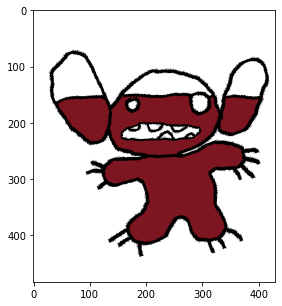

In [44]:
fig, ax = plt.subplots(figsize=(5,5)) # generating figure & axis objects

ax.imshow(im_data) # using the matplotlib imshow function to plot image data

plt.show() # showing the image

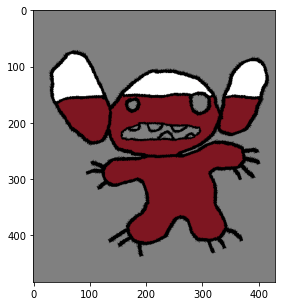

In [47]:
fig, ax = plt.subplots(figsize=(5,5)) # generating figure & axis objects

# to make the background a specific color
ax.set_facecolor("gray") # note: in the notes this is done a bit differently!
ax.imshow(im_data) # using the matplotlib imshow function to plot image data

plt.show() # showing the image

Our task: want to measure and visualize the goodness and badness levels of Stitch.

The issue with the current representation is that it violates the Principle of Proportional Ink -- the volume of pixels that are red is NOT the same as the "level of badness" if we are using a thermometer metaphor.

We are going to create a *filtering mask* to "mask out" only the "good pixels" of this image (filtering operation!)

In [48]:
# create a red-channel "good mask"
reds_good_mask = im_data[:,:,0] == 255 # if the red channel = 255, this is the white color

In [49]:
reds_good_mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [50]:
im_data[reds_good_mask]

array([[255, 255, 255, 255],
       [255, 255, 255, 255],
       [255, 255, 255, 255],
       ...,
       [255, 255, 255, 255],
       [255, 255, 255, 255],
       [255, 255, 255, 255]], dtype=uint8)

To be *sure* we have only the white pixels, we should really do a mask over all channels:

In [51]:
reds_good_mask = im_data[:,:,0] == 255 # if the red channel = 255, this is the white color
greens_good_mask = im_data[:,:,1] == 255 # if the green channel = 255, this is the white color
blues_good_mask = im_data[:,:,2] == 255 # if the blue channel = 255, this is the white color
alphas_good_mask = im_data[:,:,3] == 255 # if the red channel = 255, this is the white color

In [52]:
# boolean combination mask:
pixel_mask_good = reds_good_mask & greens_good_mask & blues_good_mask & alphas_good_mask

Using this full boolean filtering mask, we can calculate all of the "good" pixels:

In [53]:
good_pixels = im_data[pixel_mask_good]

In [54]:
ngood = len(good_pixels)

In [55]:
ngood

11929

Quick example to check our logic -- a plot:

In [56]:
im_copy = im_data.copy() # copy of original image
# turn everything into black & see-through that is NOT a good pixel:
im_copy[~pixel_mask_good] = 0

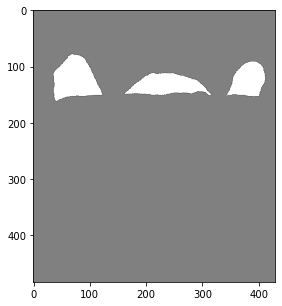

In [57]:
fig, ax = plt.subplots(figsize=(5,5))

ax.set_facecolor("gray")
ax.imshow(im_copy)
plt.show()

Make a mask for "bad" pixels:

In [58]:
# [126,  22,  33, 255]
pixel_mask_bad = (im_data[:,:,0] == 126) & \
                  (im_data[:,:,1] == 22) & \
                  (im_data[:,:,2] == 33) & \
                  (im_data[:,:,3] == 255)

In [59]:
nbad = len(im_data[pixel_mask_bad])

In [60]:
nbad

40949

Assuming the principle of portional ink holds: we can calculate the percentages of good and bad pixels:

In [61]:
total = ngood + nbad # ignores the background and black outlines
badness = nbad/total
goodness = ngood/total

In [62]:
badness, goodness

(0.774405234691176, 0.22559476530882408)

To compare, let's use the therometer analogy and compare heights:

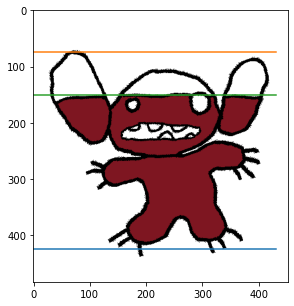

In [66]:
fig, ax = plt.subplots(figsize=(5,5))

ax.imshow(im_data)
# draw some lines to see approximate goodness/badness based on height
ax.plot([0,430], [425, 425]) # approximate bottom line
ax.plot([0,430], [75,75]) # top of stitch
ax.plot([0,430], [150, 150]) # top of bad line

plt.show()

In [67]:
goodness_apparent = (75-150)/(75-425)

In [68]:
goodness_apparent

0.21428571428571427

In [69]:
1.0-goodness_apparent

0.7857142857142857

So far, we've done *filtering* and *mutation* - we'll use our new data to make some ~~histograms~~ bar charts.  Bar charts are a better choice for comparing different numbers along 1-axis (how to choose plots later).

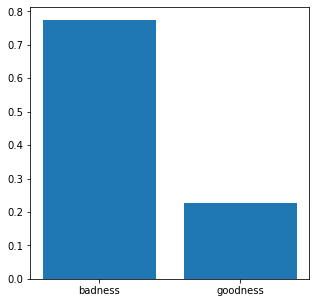

In [70]:
fig, ax = plt.subplots(figsize=(5,5))

labels = np.array(['badness', 'goodness']) # labels for our x-axis
values = np.array([badness, goodness]) # heights for our y-axis

ax.bar(labels, values) # is another plotting routine in matplotlib (barchart)

plt.show()

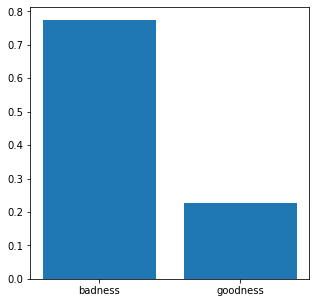

In [71]:
fig, ax = plt.subplots(figsize=(5,5))

labels = np.array(['badness', 'goodness']) # labels for our x-axis
values = np.array([badness, goodness]) # heights for our y-axis
# want to add the ability to visualize colors so we can compare to our image
colors = np.array(['maroon', 'gray'])

myBarChart = ax.bar(labels, values) # is another plotting routine in matplotlib (barchart)

plt.show()

In [73]:
myBarChart # objects, which are my 2 bars

<BarContainer object of 2 artists>

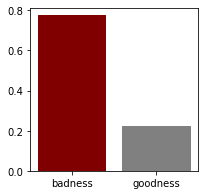

In [75]:
fig, ax = plt.subplots(figsize=(3,3))

labels = np.array(['badness', 'goodness']) # labels for our x-axis
values = np.array([badness, goodness]) # heights for our y-axis
# want to add the ability to visualize colors so we can compare to our image
colors = np.array(['maroon', 'gray'])

myBarChart = ax.bar(labels, values) # is another plotting routine in matplotlib (barchart)

# loop through each bar and set it to a particular color
for i in range(len(myBarChart)): # through all bars
    myBarChart[i].set_color(colors[i]) # setting the color of the ith bar

plt.show()

Ideally - we can use the unique colors in our image (calculated before) to make the colors of each bar.

In [76]:
number_of_pixels_of_a_color = [] # store the number of pixels of a particular color in my image
color_labels = [] # store the color label for the x-axis
color_values = [] # RGBA sequence

In [77]:
# grab unique colors in my image
unique_colors = np.unique(im_data.reshape(-1, im_data.shape[2]),axis=0)

In [78]:
unique_colors

array([[  0,   0,   0,   0],
       [  0,   0,   0, 255],
       [126,  22,  33, 255],
       [255, 255, 255, 255]], dtype=uint8)

In [95]:
number_of_pixels_of_a_color = [] # store the number of pixels of a particular color in my image
color_labels = [] # store the color label for the x-axis
color_values = [] # RGBA sequence

for icolor, rgba in enumerate(unique_colors): # loop over every unique color (count with icolor), rgba=particular color
    #print(icolor, rgba)
    
    # creating a filtering mask for a particular color
    red_mask = im_data[:,:,0] == rgba[0] # [all y pixels, all x pixels, R color] == unique_color's Red channel
    green_mask = im_data[:,:,1] == rgba[1] #[all y pixels, all x pixels, G color] == unique_color's Green channel
    blue_mask = im_data[:,:,2] == rgba[2] #[all y pixels, all x pixels, B color] == unique_color's Blue channel
    alpha_mask = im_data[:,:,3] == rgba[3] #[all y pixels, all x pixels, A channel] == unique_color's Alpha channel
    
    pixel_mask = red_mask & green_mask & blue_mask & alpha_mask
    
    # count all of the pixels of a particular color
    npixels = len(im_data[pixel_mask])
    #print(icolor, rgba, npixels)
    number_of_pixels_of_a_color.append(npixels) # storing the number of pixels
    
    # store the color name for our x-axis
    color_labels.append("Color #"+str(icolor))
    
    # color values (for the color of each bar)
    color_values.append(rgba/255) # for the barchart its expecting colors between 0-1

In [96]:
number_of_pixels_of_a_color

[135103, 19709, 40949, 11929]

In [97]:
color_labels

['Color #0', 'Color #1', 'Color #2', 'Color #3']

In [98]:
color_values

[array([0., 0., 0., 0.]),
 array([0., 0., 0., 1.]),
 array([0.49411765, 0.08627451, 0.12941176, 1.        ]),
 array([1., 1., 1., 1.])]

Finally, we can use all of these to make our bar chart!

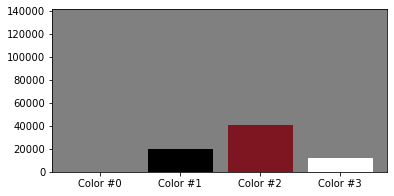

In [103]:
fig, ax = plt.subplots(figsize=(6,3))

#labels = np.array(['badness', 'goodness']) # labels for our x-axis
#values = np.array([badness, goodness]) # heights for our y-axis
# want to add the ability to visualize colors so we can compare to our image
#colors = np.array(['maroon', 'gray'])

#myBarChart = ax.bar(labels, values) # is another plotting routine in matplotlib (barchart)
ax.set_facecolor('gray')
myBarChart = ax.bar(color_labels, number_of_pixels_of_a_color) # labels, # of pixels

# loop through each bar and set it to a particular color
for i in range(len(myBarChart)): # through all bars
    #myBarChart[i].set_color(colors[i]) # setting the color of the ith bar
    myBarChart[i].set_color(color_values[i]) # setting the color of the ith bar

plt.show()

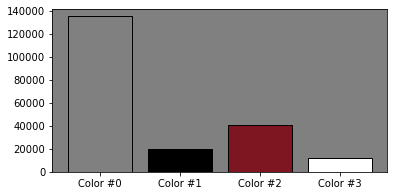

In [104]:
fig, ax = plt.subplots(figsize=(6,3))

ax.set_facecolor('gray')
myBarChart = ax.bar(color_labels, number_of_pixels_of_a_color) # labels, # of pixels

# loop through each bar and set it to a particular color
for i in range(len(myBarChart)): # through all bars
    myBarChart[i].set_color(color_values[i]) # setting the color of the ith bar
    myBarChart[i].set_edgecolor('black')

plt.show()

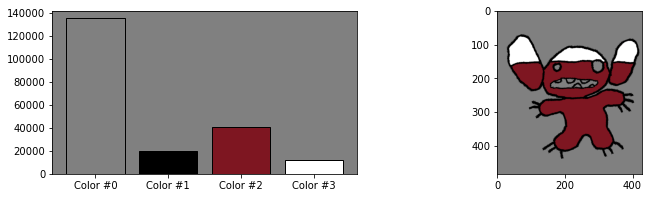

In [110]:
# real quick: side-by-side images
fig, ax = plt.subplots(1,2, figsize=(12,3))

ax[0].set_facecolor('gray')
myBarChart = ax[0].bar(color_labels, number_of_pixels_of_a_color) # labels, # of pixels

# loop through each bar and set it to a particular color
for i in range(len(myBarChart)): # through all bars
    myBarChart[i].set_color(color_values[i]) # setting the color of the ith bar
    myBarChart[i].set_edgecolor('black')
    
# also plot image
ax[1].set_facecolor('gray')
ax[1].imshow(im_data)

plt.show()

In [106]:
ax

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7feb982fde10>,
      dtype=object)